In [34]:
import pdfplumber
import pandas as pd
import re
import os
from datetime import datetime

# Function to standardize date formats
def standardize_date(date_str):
    formats = ["%d.%m.%y", "%d-%b-%y", "%d/%m/%Y"]
    for fmt in formats:
        try:
            return datetime.strptime(date_str, fmt).strftime("%Y-%m-%d")
        except ValueError:
            continue
    return None  # Return None if no format matches

# for visa and amex

# Path to the folder containing PDFs
pdf_folder = "/Users/loschichis/Library/CloudStorage/OneDrive-Personal/Max/05 Projects/Financial Control/raw_pdfs"

# List to store extracted data
data = []

# List to store unprocessed lines
unprocessed = []

# Process each PDF in the folder
for pdf_file in os.listdir(pdf_folder):
    if pdf_file.endswith(".pdf"):
        pdf_path = os.path.join(pdf_folder, pdf_file)
        print(f"Processing: {pdf_file}")

        # Open the PDF
        with pdfplumber.open(pdf_path) as pdf:
            for page_number, page in enumerate(pdf.pages, start=1):
                text = page.extract_text()
                if text:  # Check if text was extracted
                    print(f"Page {page_number} of file {pdf_file} processed.")
                    # Split the text into lines
                    for line in text.split("\n"):
                        # Adjusted pattern to extract date, description, additional code, and amount
                        match = re.match(r"(\d{2}\.\d{2}\.\d{2})\s+\S+\s+(.+?)\s+(\d{8,})?\s*([\d.,]+)$", line)
                        if match:
                            fecha, descripcion, codigo_adicional, monto = match.groups()
                            # Standardize the date
                            standardized_date = standardize_date(fecha)
                            if standardized_date:
                                # Replace commas with dots in the amount
                                monto = float(monto.replace(".", "").replace(",", "."))
                                data.append({
                                    "Date": standardized_date,
                                    "Description": descripcion,
                                    "Additional Code": codigo_adicional if codigo_adicional else "N/A",
                                    "Amount": monto
                                })
                            else:
                                unprocessed.append(line)  # Store lines with invalid dates
                        else:
                            unprocessed.append(line)  # Store unprocessed lines

# Convert to DataFrame
df = pd.DataFrame(data)

# Save to a CSV file
output_path = "/Users/loschichis/Library/CloudStorage/OneDrive-Personal/Max/05 Projects/Financial Control/processed_data/extracted_data.csv"
df.to_csv(output_path, index=False)
print(f"Data saved to {output_path}")

# Save unprocessed lines to a log file
unprocessed_path = "/Users/loschichis/Library/CloudStorage/OneDrive-Personal/Max/05 Projects/Financial Control/processed_data/unprocessed_lines.txt"
with open(unprocessed_path, "w") as f:
    for line in unprocessed:
        f.write(line + "\n")
print(f"Unprocessed lines saved to {unprocessed_path}")


Processing: visa 07 24.pdf
Page 1 of file visa 07 24.pdf processed.
Page 2 of file visa 07 24.pdf processed.
Page 3 of file visa 07 24.pdf processed.
Processing: Amex 11 24.pdf
Page 1 of file Amex 11 24.pdf processed.
Page 2 of file Amex 11 24.pdf processed.
Processing: Amex 03 24.pdf
Page 1 of file Amex 03 24.pdf processed.
Page 2 of file Amex 03 24.pdf processed.
Processing: Amex 01 24.pdf
Page 1 of file Amex 01 24.pdf processed.
Page 2 of file Amex 01 24.pdf processed.
Processing: visa 05 24.pdf
Page 1 of file visa 05 24.pdf processed.
Page 2 of file visa 05 24.pdf processed.
Page 3 of file visa 05 24.pdf processed.
Processing: visa 09 24.pdf
Page 1 of file visa 09 24.pdf processed.
Page 2 of file visa 09 24.pdf processed.
Page 3 of file visa 09 24.pdf processed.
Processing: Amex 09 24.pdf
Page 1 of file Amex 09 24.pdf processed.
Page 2 of file Amex 09 24.pdf processed.
Processing: Amex 05 24.pdf
Page 1 of file Amex 05 24.pdf processed.
Page 2 of file Amex 05 24.pdf processed.
Page 

In [35]:


# Function to standardize date formats
def standardize_date(date_str):
    formats = ["%d-%b-%y", "%d/%m/%Y", "%d.%m.%y"]
    for fmt in formats:
        try:
            return datetime.strptime(date_str, fmt).strftime("%Y-%m-%d")
        except ValueError:
            continue
    return None  # Return None if no format matches

# Path to the folder containing PDFs
pdf_folder = "/Users/loschichis/Library/CloudStorage/OneDrive-Personal/Max/05 Projects/Financial Control/mc"

# List to store extracted data
data = []

# List to store unprocessed lines
unprocessed = []

# Process each PDF in the folder
for pdf_file in os.listdir(pdf_folder):
    if pdf_file.endswith(".pdf"):
        pdf_path = os.path.join(pdf_folder, pdf_file)
        print(f"Processing: {pdf_file}")

        # Open the PDF
        with pdfplumber.open(pdf_path) as pdf:
            for page_number, page in enumerate(pdf.pages, start=1):
                text = page.extract_text()
                if text:  # Check if text was extracted
                    print(f"Page {page_number} of file {pdf_file} processed.")
                    # Split the text into lines
                    for line in text.split("\n"):
                        # Adjusted pattern to extract date, description, code, and amount
                        match = re.match(r"(\S+)\s+(.+?)\s+(\d+)?\s+([\d.,]+)$", line)
                        if match:
                            fecha, descripcion, codigo, monto = match.groups()
                            # Standardize the date
                            standardized_date = standardize_date(fecha)
                            if standardized_date:
                                # Replace commas with dots in the amount
                                monto = float(monto.replace(".", "").replace(",", "."))
                                data.append({
                                    "Date": standardized_date,
                                    "Description": descripcion.strip(),
                                    "Code": codigo if codigo else "N/A",
                                    "Amount": monto
                                })
                            else:
                                unprocessed.append(line)  # Store lines with invalid dates
                        else:
                            unprocessed.append(line)  # Store unprocessed lines

# Convert to DataFrame
df = pd.DataFrame(data)

# Save to a CSV file
output_path = "/Users/loschichis/Library/CloudStorage/OneDrive-Personal/Max/05 Projects/Financial Control/processed_data/extracted_data_mc.csv"
df.to_csv(output_path, index=False)
print(f"Data saved to {output_path}")

# Save unprocessed lines to a log file
unprocessed_path = "/Users/loschichis/Library/CloudStorage/OneDrive-Personal/Max/05 Projects/Financial Control/processed_data/unprocessed_lines_mc.txt"
with open(unprocessed_path, "w") as f:
    for line in unprocessed:
        f.write(line + "\n")
print(f"Unprocessed lines saved to {unprocessed_path}")


Processing: mc 07 24.pdf
Page 1 of file mc 07 24.pdf processed.
Page 2 of file mc 07 24.pdf processed.
Page 3 of file mc 07 24.pdf processed.
Page 4 of file mc 07 24.pdf processed.
Processing: mc 05 24.pdf
Page 1 of file mc 05 24.pdf processed.
Page 2 of file mc 05 24.pdf processed.
Page 3 of file mc 05 24.pdf processed.
Page 4 of file mc 05 24.pdf processed.
Processing: mc 09 24.pdf
Page 1 of file mc 09 24.pdf processed.
Page 2 of file mc 09 24.pdf processed.
Page 3 of file mc 09 24.pdf processed.
Page 4 of file mc 09 24.pdf processed.
Processing: mc 01 24.pdf
Page 1 of file mc 01 24.pdf processed.
Page 2 of file mc 01 24.pdf processed.
Page 3 of file mc 01 24.pdf processed.
Page 4 of file mc 01 24.pdf processed.
Page 5 of file mc 01 24.pdf processed.
Processing: mc 03 24.pdf
Page 1 of file mc 03 24.pdf processed.
Page 2 of file mc 03 24.pdf processed.
Page 3 of file mc 03 24.pdf processed.
Page 4 of file mc 03 24.pdf processed.
Processing: mc 11 24.pdf
Page 1 of file mc 11 24.pdf pro

In [36]:


# Paths to the files
file_visa_amex = "/Users/loschichis/Library/CloudStorage/OneDrive-Personal/Max/05 Projects/Financial Control/processed_data/extracted_data.csv"
file_mc = "/Users/loschichis/Library/CloudStorage/OneDrive-Personal/Max/05 Projects/Financial Control/processed_data/extracted_data_mc.csv"

# Load the data
visa_amex_df = pd.read_csv(file_visa_amex, usecols=["Date", "Description", "Amount"])
mc_df = pd.read_csv(file_mc, usecols=["Date", "Description", "Amount"])

# Append both tables
combined_df = pd.concat([visa_amex_df, mc_df], ignore_index=True)

# Save the combined table to a new CSV file
output_combined_path = "/Users/loschichis/Library/CloudStorage/OneDrive-Personal/Max/05 Projects/Financial Control/processed_data/combined_data.csv"
combined_df.to_csv(output_combined_path, index=False)

print(f"Combined table saved to {output_combined_path}")


Combined table saved to /Users/loschichis/Library/CloudStorage/OneDrive-Personal/Max/05 Projects/Financial Control/processed_data/combined_data.csv


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 996 entries, 0 to 995
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         996 non-null    object 
 1   Description  996 non-null    object 
 2   Amount       996 non-null    float64
dtypes: float64(1), object(2)
memory usage: 23.5+ KB
None
              Amount
count     996.000000
mean    21898.588665
std     47333.664182
min         0.000000
25%       277.500000
50%      7600.000000
75%     19853.000000
max    404069.000000


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



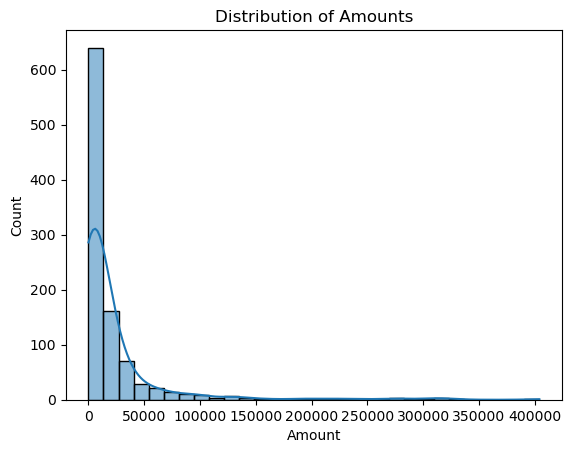

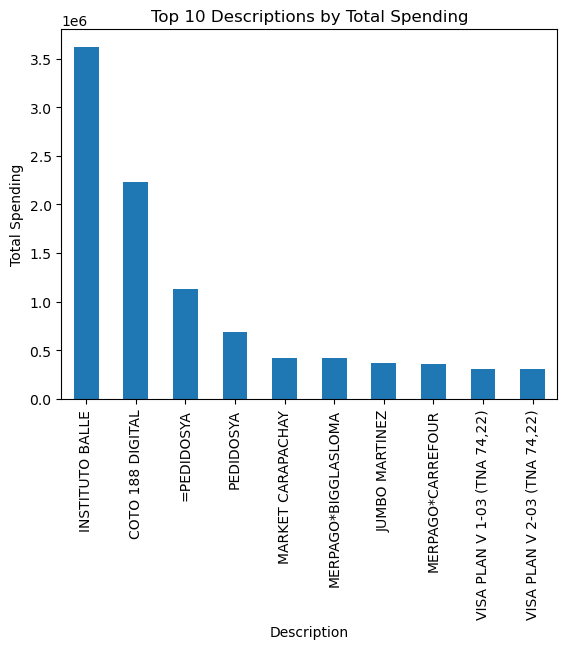

In [37]:
# EDA

import matplotlib.pyplot as plt
import seaborn as sns

# Load combined data
df = pd.read_csv("/Users/loschichis/Library/CloudStorage/OneDrive-Personal/Max/05 Projects/Financial Control/processed_data/combined_data.csv")

# Quick overview
print(df.info())
print(df.describe())

# Distribution of amounts
sns.histplot(df['Amount'], bins=30, kde=True)
plt.title("Distribution of Amounts")
plt.show()

# Top descriptions by total spending
top_descriptions = df.groupby('Description')['Amount'].sum().nlargest(10)
top_descriptions.plot(kind='bar')
plt.title("Top 10 Descriptions by Total Spending")
plt.ylabel("Total Spending")
plt.show()


In [48]:
df['Description'].value_counts().head(30)

Description
=PEDIDOSYA                            67
=PEDIDOSYA _ PROPINA                  53
PEDIDOSYA                             51
PEDIDOSYA _ PROPINA                   22
INSTITUTO BALLE                       14
PEDIDOSYA - PROPINA                   14
COTO 188 DIGITAL                      14
PAYU*AR*UBER                          13
TELECOM ARGENTINA                     12
PEDIDOS YA - PROPINAS                 12
AGUA Y SANEAMIEN                      12
MERPAGO*CARREFOUR                     11
MERPAGO*CAFEMARTINEZ                  11
MERCADOPAGO*QR                        10
DLO*RAPPI                             10
PEDIDOSYA _ PROPIN                     9
MARKET CARAPACHAY                      9
MERPAGO*BIGGLASLOMA                    8
WWW.SMILES.COM.AR                      7
MERPAGO*SAINJUANIGNAC                  7
Microsoft*Micros(USA,ARS, 3499,00)     7
DISCO SM 235                           7
MERPAGO*YPF                            7
MERPAGO*IVESSROSMINOY                  7
PAGO

In [55]:
# Dictiorary to map descriptions to categories
description_to_category = {
    'PUMAS': 'Ropa',
    'DEXTER': 'Ropa',
    'IVESS': 'Servicios Públicos',
    'HIPODROMO': 'Entretenimiento',
    'MCDONALD': 'McDonalds',
    'PEDIDOSYA': 'Delivery',
    'PROPINA': 'Delivery - Propinas',
    'EDENOR': 'Servicios Públicos',
    'SMILES': 'Programas de Puntos',
    'RAPPI': 'Delivery',
    'CARREFOUR': 'Supermercados',
    'CAFEMARTINEZ': 'Cafeterías',
    'TELECOM': 'Servicios de Telecomunicaciones',
    'UBER': 'Transporte',
    'COTO': 'Supermercados',
    'MARKET CARAPACHAY': 'Supermercados',
    'PUMAENERGY': 'Combustible',
    'YPF': 'Combustible',
    'COMBUSTIBLE': 'Combustible',
    'JUMBO': 'Supermercados',
    'DISCO': 'Supermercados',
    'AZTECA DIGITAL': 'Electrónica',
    'MICROSOFT': 'Suscripciones',
    'ADOBE': 'Suscripciones',
    'GITHUB': 'Suscripciones',
    'APPLE': 'Suscripciones',
    'CREMOLATTI': 'Heladería',
    'GREEN EAT': 'Restaurantes',
    'BURGER KING': 'Restaurantes',
    'MC DONALD': 'Restaurantes',
    'PLAYLAND': 'Entretenimiento',
    'DLO': 'Delivery',
    'PAYU*AR*UBER': 'Transporte',
    ' C.': 'Cuotas',
    'MERPAGO': 'Pagos Mercado Pago',
    'OPENAI': 'Suscripciones',
    'CABIFY': 'Transporte',
    'BALLE': 'I BALLESTER',
    'AGUA Y': 'Servicios Públicos',
    'CABLEVISION': 'Servicios de Telecomunicaciones',
    'NETFLIX': 'Suscripciones',
    'SPOTIFY': 'Suscripciones',
    'AMAZON': 'Suscripciones',
    'CINEMARK': 'Entretenimiento',
    'SHELL': 'Combustible',
    'FARMACITY': 'Farmacias',
    'FARMACIA': 'Farmacias',
    'VISA PLAN': 'Pagos VISA',
    'ROCK FELLERS': 'Restaurantes',
    'SAMSHOP': 'Celular',
    'GMRA': 'Celular',
    'CENCOSUD': 'Supermercados',
    'ZARA': 'Ropa',
    'PEDIDOS YA': 'Delivery',
    'BIGG': 'Suscripciones',
    'INFRACC': 'Multas',
    'MERCADOPAGO': 'Pagos Mercado Pago',
    'AGOSTINA Y': 'Supermercados',
    'JOE S': 'Restaurantes',
    'TACO BOX': 'Restaurantes',
    'MERCPAGO': 'Pagos Mercado Pago'
}

# Paths to the files
file_visa_amex = "/Users/loschichis/Library/CloudStorage/OneDrive-Personal/Max/05 Projects/Financial Control/processed_data/extracted_data.csv"
file_mc = "/Users/loschichis/Library/CloudStorage/OneDrive-Personal/Max/05 Projects/Financial Control/processed_data/extracted_data_mc.csv"

# Load the data
visa_amex_df = pd.read_csv(file_visa_amex, usecols=["Date", "Description", "Amount"])
mc_df = pd.read_csv(file_mc, usecols=["Date", "Description", "Amount"])

# Append both tables
combined_df = pd.concat([visa_amex_df, mc_df], ignore_index=True)

# Ensure 'Category' column is added
combined_df['Category'] = combined_df['Description'].apply(
    lambda x: next((cat for desc, cat in description_to_category.items() if desc in x), "Other")
)

# Save the updated combined table with the new column
output_combined_path = "/Users/loschichis/Library/CloudStorage/OneDrive-Personal/Max/05 Projects/Financial Control/processed_data/combined_data.csv"
combined_df.to_csv(output_combined_path, index=False)

print(f"Combined table with 'Category' column saved to {output_combined_path}")


Combined table with 'Category' column saved to /Users/loschichis/Library/CloudStorage/OneDrive-Personal/Max/05 Projects/Financial Control/processed_data/combined_data.csv
